<a href="https://colab.research.google.com/github/Rajnishmaurya/ML-/blob/main/K_Means_clustering_with_Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv')

Dataset includes:
1. Annual Income
2. Spending Score(1-100)

In [4]:
X=data.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


We will use elbow method to find the number of correct segmentation of the dataset for the customer segmentation.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

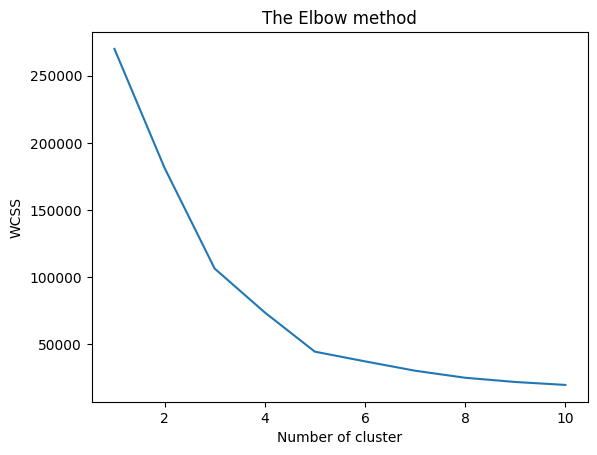

In [5]:
#elbow method

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

Best number of cluster is 5

In [8]:
# Fitting k-means to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [9]:
# Dataset which comes under cluster 2
X[y_kmeans==2]

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29


In [13]:
# it predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[15,39]]))
test[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2

In [14]:
# saving the model to the file system
import pickle
filename='finalized_model.pickle'
pickle.dump(kmeans,open(filename,'wb'))

In [17]:
# Looking at the points which belong to cluster 0
X[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


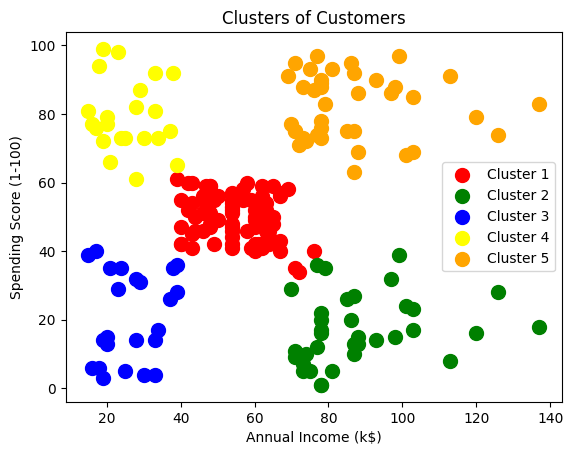

In [20]:
# Visualising the cluster
plt.scatter(X[y_kmeans==0]['Annual Income (k$)'],X[y_kmeans==0]['Spending Score (1-100)'],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1]['Annual Income (k$)'],X[y_kmeans==1]['Spending Score (1-100)'],s=100,c='green',label='Cluster 2')
plt.scatter(X[y_kmeans==2]['Annual Income (k$)'],X[y_kmeans==2]['Spending Score (1-100)'],s=100,c='blue',label='Cluster 3')
plt.scatter(X[y_kmeans==3]['Annual Income (k$)'],X[y_kmeans==3]['Spending Score (1-100)'],s=100,c='yellow',label='Cluster 4')
plt.scatter(X[y_kmeans==4]['Annual Income (k$)'],X[y_kmeans==4]['Spending Score (1-100)'],s=100,c='orange',label='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()